# 4. 인구 데이터 분석
* 인구수 변동 현황
* 가장 인구수가 늘어난 지역
* 가장 인구수가 줄어든 지역
* 가장 10대20대가 많은 지역
* 노인 연령층이 높은 지역
* 아이와 노인의 비율


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('인구수.csv', encoding='euc-kr', thousands=',')
df

,행정구역,2011년_총인구수,2011년_세대수,2011년_남자 인구수,2011년_여자 인구수,2012년_총인구수,2012년_세대수,2012년_남자 인구수,2012년_여자 인구수,2013년_총인구수,...,2018년_남자 인구수,2018년_여자 인구수,2019년_총인구수,2019년_세대수,2019년_남자 인구수,2019년_여자 인구수,2020년_총인구수,2020년_세대수,2020년_남자 인구수,2020년_여자 인구수
0,전국,50734284,20033142,25406934,25327350,50948272,20211770,25504060,25444212,51141463,...,25866129,25959930,51849861,22481466,25864816,25985045,51829023,23093108,25841029,25987994
1,서울,10249679,4192752,5073899,5175780,10195318,4177970,5041336,5153982,10143645,...,4773899,4991724,9729107,4327605,4744059,4985048,9668465,4417954,4701723,4966742
2,부산,3550963,1381257,1762848,1788115,3538484,1389526,1754479,1784005,3527635,...,1692421,1749032,3413841,1497908,1675417,1738424,3391946,1530431,1661000,1730946
3,대구,2507271,940770,1251577,1255694,2505644,948652,1249320,1256324,2501588,...,1219342,1242427,2438031,1031251,1205286,1232745,2418346,1056627,1193109,1225237
4,인천,2801274,1077563,1410980,1390294,2843981,1097491,1431593,1412388,2879782,...,1481844,1472798,2957026,1238641,1482249,1474777,2942828,1267956,1473943,1468885
5,광주,1463464,549105,725606,737858,1469216,555538,728406,740810,1472910,...,722581,736755,1456468,616485,720740,735728,1450062,633582,717348,732714
6,대전,1515603,566324,759188,756415,1524583,575600,763671,760912,1532811,...,744338,745598,1474870,635343,736607,738263,1463882,652783,730699,733183
7,울산,1135494,412561,583825,551669,1147256,422177,590424,556832,1156480,...,593819,561804,1148019,468659,589712,558307,1136017,476893,583708,552309
8,세종,0,0,0,0,113117,46592,57633,55484,122153,...,156831,157295,340575,135408,169845,170730,355831,144275,177568,178263
9,경기,11937415,4579405,6015357,5922058,12093299,4639665,6091035,6002264,12234630,...,6577501,6499652,13239666,5468920,6659995,6579671,13427014,5676401,6754469,6672545


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   행정구역          18 non-null     object
 1   2011년_총인구수    18 non-null     int64 
 2   2011년_세대수     18 non-null     int64 
 3   2011년_남자 인구수  18 non-null     int64 
 4   2011년_여자 인구수  18 non-null     int64 
 5   2012년_총인구수    18 non-null     int64 
 6   2012년_세대수     18 non-null     int64 
 7   2012년_남자 인구수  18 non-null     int64 
 8   2012년_여자 인구수  18 non-null     int64 
 9   2013년_총인구수    18 non-null     int64 
 10  2013년_세대수     18 non-null     int64 
 11  2013년_남자 인구수  18 non-null     int64 
 12  2013년_여자 인구수  18 non-null     int64 
 13  2014년_총인구수    18 non-null     int64 
 14  2014년_세대수     18 non-null     int64 
 15  2014년_남자 인구수  18 non-null     int64 
 16  2014년_여자 인구수  18 non-null     int64 
 17  2015년_총인구수    18 non-null     int64 
 18  2015년_세대수     18 non-null     int64 
 19  2015년_남자 인

In [4]:
df.head()

,행정구역,2011년_총인구수,2011년_세대수,2011년_남자 인구수,2011년_여자 인구수,2012년_총인구수,2012년_세대수,2012년_남자 인구수,2012년_여자 인구수,2013년_총인구수,...,2018년_남자 인구수,2018년_여자 인구수,2019년_총인구수,2019년_세대수,2019년_남자 인구수,2019년_여자 인구수,2020년_총인구수,2020년_세대수,2020년_남자 인구수,2020년_여자 인구수
0,전국,50734284,20033142,25406934,25327350,50948272,20211770,25504060,25444212,51141463,...,25866129,25959930,51849861,22481466,25864816,25985045,51829023,23093108,25841029,25987994
1,서울,10249679,4192752,5073899,5175780,10195318,4177970,5041336,5153982,10143645,...,4773899,4991724,9729107,4327605,4744059,4985048,9668465,4417954,4701723,4966742
2,부산,3550963,1381257,1762848,1788115,3538484,1389526,1754479,1784005,3527635,...,1692421,1749032,3413841,1497908,1675417,1738424,3391946,1530431,1661000,1730946
3,대구,2507271,940770,1251577,1255694,2505644,948652,1249320,1256324,2501588,...,1219342,1242427,2438031,1031251,1205286,1232745,2418346,1056627,1193109,1225237
4,인천,2801274,1077563,1410980,1390294,2843981,1097491,1431593,1412388,2879782,...,1481844,1472798,2957026,1238641,1482249,1474777,2942828,1267956,1473943,1468885


In [7]:
df_2011 = pd.melt(df, id_vars=['행정구역'], value_vars=['2011년_총인구수'], var_name='년도', value_name='인구수')
df_2011.년도 = 2011
df_2011

,행정구역,년도,인구수
0,전국,2011,50734284
1,서울,2011,10249679
2,부산,2011,3550963
3,대구,2011,2507271
4,인천,2011,2801274
5,광주,2011,1463464
6,대전,2011,1515603
7,울산,2011,1135494
8,세종,2011,0
9,경기,2011,11937415


In [8]:
df_2011_m = pd.melt(df, id_vars=['행정구역'], value_vars=['2011년_남자 인구수'], var_name='년도', value_name='남자')
df_2011_m.년도 = 2011
df_2011_m

,행정구역,년도,남자
0,전국,2011,25406934
1,서울,2011,5073899
2,부산,2011,1762848
3,대구,2011,1251577
4,인천,2011,1410980
5,광주,2011,725606
6,대전,2011,759188
7,울산,2011,583825
8,세종,2011,0
9,경기,2011,6015357


In [9]:
df_2011_f = pd.melt(df, id_vars=['행정구역'], value_vars=['2011년_여자 인구수'], var_name='년도', value_name='여자')
df_2011_f.년도 = 2011
df_2011_f

,행정구역,년도,여자
0,전국,2011,25327350
1,서울,2011,5175780
2,부산,2011,1788115
3,대구,2011,1255694
4,인천,2011,1390294
5,광주,2011,737858
6,대전,2011,756415
7,울산,2011,551669
8,세종,2011,0
9,경기,2011,5922058


In [10]:
df_2011_all = pd.merge(df_2011,df_2011_m, on=['행정구역', '년도'], how='inner')
df_2011_all

,행정구역,년도,인구수,남자
0,전국,2011,50734284,25406934
1,서울,2011,10249679,5073899
2,부산,2011,3550963,1762848
3,대구,2011,2507271,1251577
4,인천,2011,2801274,1410980
5,광주,2011,1463464,725606
6,대전,2011,1515603,759188
7,울산,2011,1135494,583825
8,세종,2011,0,0
9,경기,2011,11937415,6015357


In [11]:
df_2011_all = pd.merge(df_2011_all,df_2011_f, on=['행정구역', '년도'], how='inner')
df_2011_all

,행정구역,년도,인구수,남자,여자
0,전국,2011,50734284,25406934,25327350
1,서울,2011,10249679,5073899,5175780
2,부산,2011,3550963,1762848,1788115
3,대구,2011,2507271,1251577,1255694
4,인천,2011,2801274,1410980,1390294
5,광주,2011,1463464,725606,737858
6,대전,2011,1515603,759188,756415
7,울산,2011,1135494,583825,551669
8,세종,2011,0,0,0
9,경기,2011,11937415,6015357,5922058


In [13]:
def population(n):
    df_temp = pd.melt(df, id_vars = ['행정구역'], value_vars=[str(n)+'년_총인구수'], var_name='년도', value_name='인구수')
    df_temp.년도 = n
    
    df_temp_m = pd.melt(df, id_vars = ['행정구역'], value_vars=[str(n)+'년_남자 인구수'], var_name='년도', value_name='남자')
    df_temp_m.년도 = n
    
    df_temp_f = pd.melt(df, id_vars = ['행정구역'], value_vars=[str(n)+'년_여자 인구수'], var_name='년도', value_name='여자')
    df_temp_f.년도 = n
    
    df_temp = pd.merge(df_temp, df_temp_m, on = ['행정구역', '년도'], how='inner')
    globals()['df_{}_all'.format(n)]= pd.merge(df_temp, df_temp_f, on = ['행정구역', '년도'], how='inner')

In [14]:
for i in range(2012, 2021):
    population(i)

In [16]:
df_2013_all

,행정구역,년도,인구수,남자,여자
0,전국,2013,51141463,25588336,25553127
1,서울,2013,10143645,5007869,5135776
2,부산,2013,3527635,1747000,1780635
3,대구,2013,2501588,1246071,1255517
4,인천,2013,2879782,1448835,1430947
5,광주,2013,1472910,730216,742694
6,대전,2013,1532811,767309,765502
7,울산,2013,1156480,595319,561161
8,세종,2013,122153,62205,59948
9,경기,2013,12234630,6159193,6075437


In [17]:
df_all = pd.concat([df_2011_all, df_2012_all])
df_all

,행정구역,년도,인구수,남자,여자
0,전국,2011,50734284,25406934,25327350
1,서울,2011,10249679,5073899,5175780
2,부산,2011,3550963,1762848,1788115
3,대구,2011,2507271,1251577,1255694
4,인천,2011,2801274,1410980,1390294
5,광주,2011,1463464,725606,737858
6,대전,2011,1515603,759188,756415
7,울산,2011,1135494,583825,551669
8,세종,2011,0,0,0
9,경기,2011,11937415,6015357,5922058


In [19]:
for n in range(2013, 2021):
    df_all = pd.concat([df_all, globals()['df_{}_all'.format(n)]])
df_all

,행정구역,년도,인구수,남자,여자
0,전국,2011,50734284,25406934,25327350
1,서울,2011,10249679,5073899,5175780
2,부산,2011,3550963,1762848,1788115
3,대구,2011,2507271,1251577,1255694
4,인천,2011,2801274,1410980,1390294
...,...,...,...,...,...
13,전북,2020,1804104,896874,907230
14,전남,2020,1851549,930615,920934
15,경북,2020,2639422,1329211,1310211
16,경남,2020,3340216,1681423,1658793


<AxesSubplot:xlabel='년도', ylabel='인구수'>

C:\Users\qkrwn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qkrwn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qkrwn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qkrwn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qkrwn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qkrwn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54665 missing from c

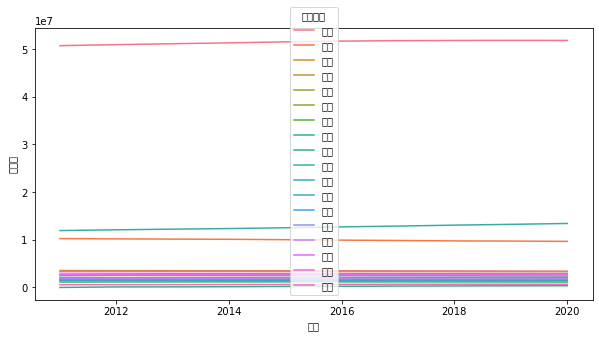

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='년도', y='인구수', hue='행정구역', data=df_all)